In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
from time import time
import matplotlib as pl
import matplotlib.pyplot as plt
import pickle

In [4]:
dataPath = '/Users/omojumiller/mycode/MachineLearningNanoDegree/IntroToMachineLearning/'
sys.path.append(dataPath+'tools/')
sys.path.append(dataPath+'final_project/')

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [5]:
### Load the dictionary containing the dataset

with open(dataPath+'final_project/final_project_dataset.pkl', "r") as data_file:
    data_dict = pickle.load(data_file)

In [7]:
# Remove the source of the outlier
data_dict.pop( 'TOTAL')


{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

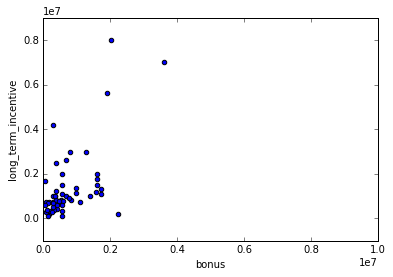

In [20]:
features_list = [ 'long_term_incentive', 'bonus']
data = featureFormat(data_dict, features_list, remove_any_zeroes=True)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

#plt.xticks(np.arange(0, 1e6, 200000), rotation = -60)
plt.xlim((0, 1e7))


plt.xlabel("bonus")
plt.ylabel("long_term_incentive")
plt.show()

In [21]:
def doPCA():
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca.fit(data)
    return pca

In [22]:
pca = doPCA()

In [23]:
print pca.explained_variance_ratio_

[ 0.90774318  0.09225682]


In [24]:
first_pc = pca.components_[0]
second_pc = pca.components_[1]

In [25]:
transformed_data = pca.transform(data)

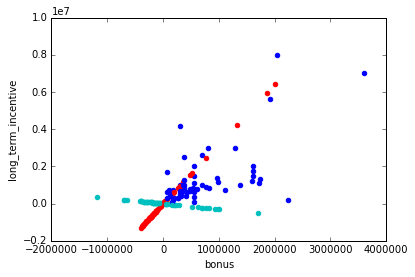

In [26]:
for ii, jj in zip(transformed_data, data):
    plt.scatter( first_pc[0]*ii[0], first_pc[1]*ii[0], color='r' )
    plt.scatter( second_pc[0]*ii[1], second_pc[1]*ii[1], color='c' )
    plt.scatter(jj[0], jj[1], color='b')

plt.xlabel("bonus")
plt.ylabel("long_term_incentive")
plt.show()